In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [10]:
housing_data = datasets.load_boston()
housing_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [11]:
# 对数据进行shuffle
X,y = shuffle(housing_data.data,housing_data.target,random_state=7)

# 获取训练集和测试集
num_training = int(0.8*len(X))
X_train,y_train = X[:num_training],y[:num_training]
X_test,y_test = X[num_training:],y[num_training:]

In [41]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train,y_train)
# dt_regressor.feature_importances_

array([ 0.03856422,  0.        ,  0.        ,  0.        ,  0.02908806,
        0.62202035,  0.00078264,  0.10473383,  0.        ,  0.        ,
        0.00460542,  0.        ,  0.20020548])

In [43]:
# 再用带AdaBoost算法的决策树回归模型进行拟合
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regressor.fit(X_train,y_train)
# ab_regressor.feature_importances_

array([ 0.03460496,  0.00260478,  0.0081857 ,  0.00061997,  0.04709509,
        0.2941107 ,  0.01169235,  0.11697942,  0.02167582,  0.0479107 ,
        0.0524251 ,  0.01856616,  0.34352926])

In [14]:
# DecisionTreeRegressor的预测效果
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print ("\n#### Decision Tree performance ####")
print ("Mean squared error =", round(mse, 2))
print ("Explained variance score =", round(evs, 2))# 可解释方差


#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


In [15]:
# AdaBoostRegressor的预测效果
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print ("\n#### AdaBoost performance ####")
print ("Mean squared error =", round(mse, 2))
print ("Explained variance score =", round(evs, 2))


#### AdaBoost performance ####
Mean squared error = 7.64
Explained variance score = 0.91


In [2]:
# 计算特征的相对重要性

NameError: name 'plot_feature_importances' is not defined

In [22]:
# 定义plot_feature_importances()函数
def plot_feature_importances(feature_importances,title,feature_names):
    # 将重要性值标准化
    feature_importances = 100.0 * (feature_importances/max(feature_importances))
    # 将得分从高到低排序 np.argsort(feature_importances做从低到高排序，np.flipud做从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
    # 让x坐标轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0]) + 0.5
    
    # 画条形图
    plt.figure()
    plt.bar(pos,feature_importances[index_sorted],align='center')
    plt.xticks(pos,feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

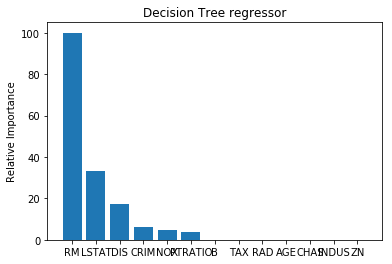

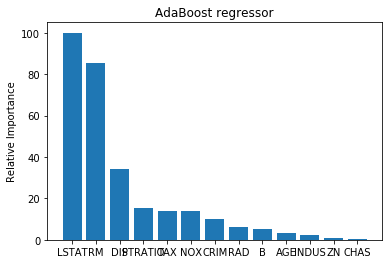

In [23]:
# 画出特征的相对重要性
plot_feature_importances(dt_regressor.feature_importances_,'Decision Tree regressor',housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_,'AdaBoost regressor',housing_data.feature_names)